In [5]:
import pathlib
import numpy as np
import pandas as pd
import xarray as xr
import tobac

In [8]:
data_path = pathlib.Path("/scratch/b/b382728/tobac_features/2021")

In [9]:
files = sorted(list(data_path.glob("tobac_202101*_ICON_feature_mask_file.nc")))
files

[PosixPath('/scratch/b/b382728/tobac_features/2021/tobac_20210101-000000_20210102-000000_ICON_feature_mask_file.nc'),
 PosixPath('/scratch/b/b382728/tobac_features/2021/tobac_20210102-000000_20210103-000000_ICON_feature_mask_file.nc'),
 PosixPath('/scratch/b/b382728/tobac_features/2021/tobac_20210103-000000_20210104-000000_ICON_feature_mask_file.nc'),
 PosixPath('/scratch/b/b382728/tobac_features/2021/tobac_20210104-000000_20210105-000000_ICON_feature_mask_file.nc'),
 PosixPath('/scratch/b/b382728/tobac_features/2021/tobac_20210105-000000_20210106-000000_ICON_feature_mask_file.nc'),
 PosixPath('/scratch/b/b382728/tobac_features/2021/tobac_20210106-000000_20210107-000000_ICON_feature_mask_file.nc'),
 PosixPath('/scratch/b/b382728/tobac_features/2021/tobac_20210107-000000_20210108-000000_ICON_feature_mask_file.nc'),
 PosixPath('/scratch/b/b382728/tobac_features/2021/tobac_20210108-000000_20210109-000000_ICON_feature_mask_file.nc'),
 PosixPath('/scratch/b/b382728/tobac_features/2021/tobac

In [10]:
ds = xr.open_dataset(files[0]).drop_vars("all_feature_labels").drop_dims(["time","lat","lon"])
ds

<xarray.Dataset> Size: 34MB
Dimensions:                   (feature: 174207)
Coordinates:
  * feature                   (feature) int64 1MB 1 2 3 ... 174205 174206 174207
Data variables: (12/15)
    frame                     (feature) int64 1MB ...
    idx                       (feature) int64 1MB ...
    y                         (feature) float64 1MB ...
    x                         (feature) float64 1MB ...
    detection_pixel_count     (feature) int64 1MB ...
    threshold_value           (feature) int64 1MB ...
    ...                        ...
    latitude                  (feature) float64 1MB ...
    longitude                 (feature) float64 1MB ...
    segmentation_pixel_count  (feature) int64 1MB ...
    area                      (feature) float64 1MB ...
    max_precip                (feature) float64 1MB ...
    total_precip              (feature) float64 1MB ...

In [11]:
ds.to_dataframe()

,frame,idx,y,x,detection_pixel_count,threshold_value,min_BT,time_feature,timestr,latitude,longitude,segmentation_pixel_count,area,max_precip,total_precip
feature,,,,,,,,,,,,,,,
1,0,3,0.875000,850.749999,16,241,238.717438,2021-01-01 00:00:00,2021-01-01 00:00:00,59.862500,85.125000,19,1.179182e+09,0.035091,2.624983e+07
2,0,5,1.687500,1364.593747,32,241,236.048599,2021-01-01 00:00:00,2021-01-01 00:00:00,59.781250,136.509375,33,2.051549e+09,0.000992,5.393671e+05
3,0,6,0.800000,1389.333332,15,241,235.188721,2021-01-01 00:00:00,2021-01-01 00:00:00,59.870000,138.983333,25,1.553055e+09,0.000021,2.585979e+03
4,0,12,1.270833,2722.625016,48,241,238.608307,2021-01-01 00:00:00,2021-01-01 00:00:00,59.822917,272.312502,49,3.042586e+09,0.100178,1.450301e+08
5,0,13,0.880000,2837.360000,25,241,239.611176,2021-01-01 00:00:00,2021-01-01 00:00:00,59.862000,283.786000,26,1.612480e+09,0.062489,9.418804e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174203,95,4751,934.541176,2965.627442,255,225,209.757462,2021-01-01 23:45:00,2021-01-01 23:45:00,-33.504118,296.612744,410,4.231376e+10,0.089757,2.160429e+07
174204,95,4753,935.619048,1650.015875,63,225,215.683975,2021-01-01 23:45:00,2021-01-01 23:45:00,-33.611905,165.051588,232,2.398120e+10,13.525263,8.349827e+09
174205,95,4756,954.850000,1695.450000,20,225,222.346588,2021-01-01 23:45:00,2021-01-01 23:45:00,-35.535000,169.595000,94,9.429064e+09,0.005714,1.459386e+06


In [12]:
rename_vars = {
    "time_feature":"time" ,
    "y":"hdim_1",
    "x":"hdim_2",
}
    

In [13]:
combined_features = tobac.utils.combine_feature_dataframes(
    [
        xr.open_dataset(f).drop_vars("all_feature_labels").drop_dims(["time","lat","lon"]).rename(rename_vars).to_dataframe().reset_index()
        for f in files
    ]
)

In [14]:
combined_features

,feature,frame,idx,hdim_1,hdim_2,detection_pixel_count,threshold_value,min_BT,time,timestr,latitude,longitude,segmentation_pixel_count,area,max_precip,total_precip
0,1,0,3,0.875000,850.749999,16,241,238.717438,2021-01-01 00:00:00,2021-01-01 00:00:00,59.862500,85.125000,19,1.179182e+09,0.035091,2.624983e+07
1,2,0,5,1.687500,1364.593747,32,241,236.048599,2021-01-01 00:00:00,2021-01-01 00:00:00,59.781250,136.509375,33,2.051549e+09,0.000992,5.393671e+05
2,3,0,6,0.800000,1389.333332,15,241,235.188721,2021-01-01 00:00:00,2021-01-01 00:00:00,59.870000,138.983333,25,1.553055e+09,0.000021,2.585979e+03
3,4,0,12,1.270833,2722.625016,48,241,238.608307,2021-01-01 00:00:00,2021-01-01 00:00:00,59.822917,272.312502,49,3.042586e+09,0.100178,1.450301e+08
4,5,0,13,0.880000,2837.360000,25,241,239.611176,2021-01-01 00:00:00,2021-01-01 00:00:00,59.862000,283.786000,26,1.612480e+09,0.062489,9.418804e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5080907,5080908,2975,4805,992.083333,2287.166667,12,225,223.431229,2021-01-31 23:45:00,2021-01-31 23:45:00,-39.258333,228.766667,289,2.767879e+10,9.427121,1.750849e+10
5080908,5080909,2975,4807,1006.878788,2300.303031,33,225,221.838959,2021-01-31 23:45:00,2021-01-31 23:45:00,-40.737879,230.080303,332,3.112467e+10,3.099747,2.226451e+10
5080909,5080910,2975,4809,1023.312500,2342.593752,32,225,223.663147,2021-01-31 23:45:00,2021-01-31 23:45:00,-42.381250,234.309375,593,5.400945e+10,0.947843,1.408866e+10
5080910,5080911,2975,4811,1044.785714,2411.928573,14,225,224.014160,2021-01-31 23:45:00,2021-01-31 23:45:00,-44.528571,241.242857,372,3.290363e+10,0.296537,6.442399e+08


In [16]:
np.where(np.isnan(combined_features["area"]))

(array([ 651509,  653195,  781807,  878268,  881497,  883108,  964212,
        1881351, 1881935, 1883130, 1883650, 1884758, 1886973, 1891756,
        2355494, 2357163, 2369725, 2371438, 2406205, 2437506, 2439010,
        2452938, 2454527, 2456137, 2654640, 2815998, 2817622, 2855401,
        3008100, 3010042, 3011868, 3013676, 3410616, 3412228, 3436641,
        3438466, 3458687, 3465967, 3942927, 3946407, 3948196, 4080968,
        4098433, 4099666, 4108466, 4534202, 4583449, 4992399, 4994041,
        5001003, 5002702]),)

In [17]:
dt = 900  # in seconds
dxy = 11100  # in meter (for Latitude)
    
parameters_tracking = dict(
    d_max=2.5*dxy,
    method_linking="predict",
    adaptive_stop=0.2,
    adaptive_step=0.95,
    stubs=2,
    memory=0,
    PBC_flag="hdim_2",
    min_h2=0,
    max_h2=3600,
)

parameters_merge = dict(
    distance=dxy*10, frame_len=2, PBC_flag="hdim_2", min_h1=0, max_h1=1200, min_h2=0, max_h2=3600,
)

In [18]:
tracks = tobac.linking_trackpy(
    combined_features,
    None,
    dt,
    dxy,
    **parameters_tracking,
)

Frame 2975: 1691 trajectories present.


In [19]:
unfiltered_tracks = tracks.copy()

In [20]:
track_min_threshold = tracks.groupby("cell").threshold_value.min()
valid_cells = track_min_threshold.index[track_min_threshold <= 225]
valid_cells = np.setdiff1d(valid_cells, -1)
wh_in_track = np.isin(tracks.cell, valid_cells)
tracks = tracks[wh_in_track]

In [21]:
merges = tobac.merge_split.merge_split_MEST(tracks, dxy, **parameters_merge)

In [22]:
tracks["track"] = merges.feature_parent_track_id.data.astype(np.int64)

track_start_time = tracks.groupby("track").time.min()
tracks["time_track"] = tracks.time - track_start_time[tracks.track].to_numpy()

track_max_cell_len = tracks.groupby("track").apply(
    lambda df: max(df.groupby("cell").apply(len, include_groups=False))
)

valid_tracks = track_max_cell_len.index[track_max_cell_len >= 3]
wh_in_track = np.isin(tracks.track, valid_tracks)
tracks = tracks[wh_in_track]

/tmp/ipykernel_1299431/1509458684.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  track_max_cell_len = tracks.groupby("track").apply(


In [23]:
tracks

,feature,frame,idx,hdim_1,hdim_2,detection_pixel_count,threshold_value,min_BT,time,timestr,latitude,longitude,segmentation_pixel_count,area,max_precip,total_precip,cell,time_cell,track,time_track
244,245,0,593,460.666667,2698.750000,12,241,210.230362,2021-01-01 00:00:00,2021-01-01 00:00:00,13.883333,269.925000,13,1.558586e+09,7.893450,2.411294e+09,245,0 days 00:00:00,1,0 days 00:00:00
287,288,0,770,529.312500,1108.875000,16,241,219.744171,2021-01-01 00:00:00,2021-01-01 00:00:00,7.018750,110.937500,20,2.451244e+09,16.900414,7.281549e+09,288,0 days 00:00:00,2,0 days 00:00:00
301,302,0,843,551.434783,1134.826087,23,241,225.410858,2021-01-01 00:00:00,2021-01-01 00:00:00,4.806522,113.532609,34,4.185231e+09,18.942616,1.031786e+10,302,0 days 00:00:00,3,0 days 00:00:00
351,352,0,1056,654.571429,855.214286,14,241,207.813599,2021-01-01 00:00:00,2021-01-01 00:00:00,-5.507143,85.571429,14,1.721082e+09,10.164636,3.730940e+09,352,0 days 00:00:00,4,0 days 00:00:00
408,409,0,1395,725.818182,1033.636364,11,241,210.462936,2021-01-01 00:00:00,2021-01-01 00:00:00,-12.631818,103.413636,11,1.325682e+09,11.008533,1.786169e+09,409,0 days 00:00:00,5,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5080906,5080907,2975,4804,981.772727,2258.045453,22,225,214.664124,2021-01-31 23:45:00,2021-01-31 23:45:00,-38.227273,225.854545,81,7.868651e+09,23.922497,1.775874e+10,1376074,0 days 00:30:00,158405,0 days 07:45:00
5080907,5080908,2975,4805,992.083333,2287.166667,12,225,223.431229,2021-01-31 23:45:00,2021-01-31 23:45:00,-39.258333,228.766667,289,2.767879e+10,9.427121,1.750849e+10,1368425,0 days 04:30:00,159269,0 days 04:30:00
5080908,5080909,2975,4807,1006.878788,2300.303031,33,225,221.838959,2021-01-31 23:45:00,2021-01-31 23:45:00,-40.737879,230.080303,332,3.112467e+10,3.099747,2.226451e+10,1373198,0 days 02:00:00,159785,0 days 02:30:00
5080910,5080911,2975,4811,1044.785714,2411.928573,14,225,224.014160,2021-01-31 23:45:00,2021-01-31 23:45:00,-44.528571,241.242857,372,3.290363e+10,0.296537,6.442399e+08,1376694,0 days 00:15:00,159908,0 days 02:00:00


In [151]:
def max_consecutive_true(condition: np.ndarray[bool]) -> int:
    """Return the maximum number of consecutive True values in 'condition'

    Parameters
    ----------
    condition : np.ndarray[bool]
        numpy array of boolean values

    Returns
    -------
    int
        the maximum number of consecutive True values in 'condition'
    """
    if np.any(condition):
        return np.max(
            np.diff(
                np.where(
                    np.concatenate(
                        ([condition[0]], condition[:-1] != condition[1:], [True])
                    )
                )[0]
            )[::2],
            initial=0,
        )
    else:
        return 0


def is_track_mcs(features: pd.DataFrame) -> pd.DataFrame:
    """Test whether each track in features meets the condtions for an MCS

    Parameters
    ----------
    features : pd.Dataframe
        _description_

    Returns
    -------
    pd.DataFrame
        _description_
    """
    consecutive_precip_max = tracks.groupby("track").apply(
        lambda df: max_consecutive_true(
            df.groupby("time").max_precip.max().to_numpy()*3.6 >= 10
        )
    )
    consecutive_area_max = tracks.groupby("track").apply(
        lambda df: max_consecutive_true(
            df.groupby("time").area.sum().to_numpy() >= 4e10
        )
    )
    max_total_precip = tracks.groupby("track").apply(
        lambda df: df.groupby("time").total_precip.sum().max()*3.6
    )
    max_feature_area = tracks.groupby("track").area.max()
    
    is_mcs = np.logical_and.reduce(
        [
            consecutive_precip_max >= 12,
            consecutive_area_max >= 12,
            max_total_precip >= 2e10,
            max_feature_area >= 4e10,
        ]
    )
    return pd.DataFrame(data=is_mcs, index=consecutive_precip_max.index)


In [152]:
mcs_tracks = is_track_mcs(tracks)

/tmp/ipykernel_1299431/1198253403.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consecutive_precip_max = tracks.groupby("track").apply(
/tmp/ipykernel_1299431/1198253403.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consecutive_area_max = tracks.groupby("track").apply(
/tmp/ipykernel_1299431/1198253403.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This beh

In [153]:
mcs_tracks.sum()

0    2397
dtype: int64

In [154]:
track_is_mcs = mcs_tracks[0][lambda x:x].index

In [155]:
track_is_mcs

Index([    77,     78,     83,    162,    173,    176,    274,    276,    289,
          290,
       ...
       158443, 158548, 158711, 158784, 158791, 158806, 159056, 159134, 159236,
       159495],
      dtype='int64', name='track', length=2397)

In [156]:
np.unique(tracks.track).size

147192

In [157]:
tracks.max_precip.max()

95.72079467773438

In [158]:
tracks.time_track.max()

Timedelta('2 days 17:00:00')

In [159]:
mcs_lifetime = tracks[np.isin(tracks.track, track_is_mcs)].groupby("track").time_track.max()

In [160]:
mcs_lifetime.min(), mcs_lifetime.max()

(Timedelta('0 days 02:45:00'), Timedelta('1 days 19:45:00'))

In [161]:
np.unique(tracks.cell).size

267955

In [41]:
track_latlon = tracks.groupby("track").apply(
    lambda df : pd.DataFrame([[
        np.nansum(df["latitude"]*df["area"])/np.nansum(df["area"]), 
        np.nansum(df["longitude"]*df["area"])/np.nansum(df["area"])
    ]], columns=["lat", "lon"]),
    include_groups=False
)

In [42]:
track_latlon

,,lat,lon
track,,,
1,0,14.004344,269.538403
2,0,6.776031,110.032093
3,0,4.328882,113.019021
4,0,-5.562277,84.938076
5,0,-12.982245,103.004184
...,...,...,...
160202,0,-17.256644,154.518136
160206,0,-19.009622,221.001923
160207,0,-19.568708,24.319531


In [45]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

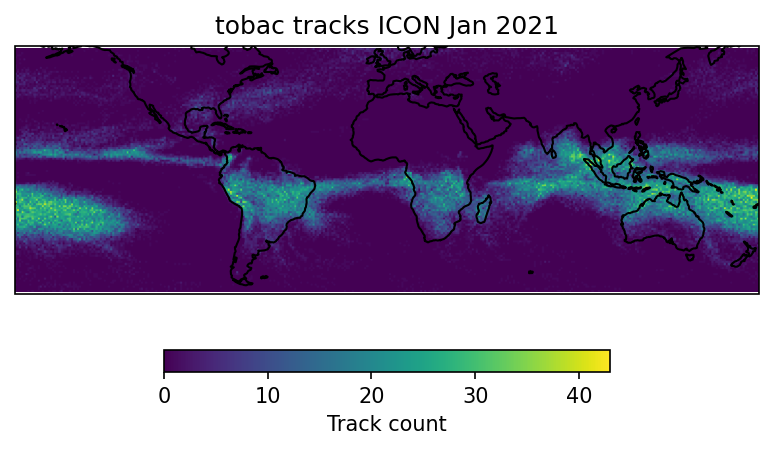

In [58]:
track_hist = np.histogram2d(
    track_latlon["lat"].to_numpy(), 
    track_latlon["lon"].to_numpy(), 
    bins=[np.linspace(-60,60,121), np.linspace(0,360,361)]
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

img = ax.imshow(track_hist, extent=[0,360,60,-60])
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("tobac tracks ICON Jan 2021")

plt.colorbar(img, label="Track count", orientation="horizontal", shrink=0.6)

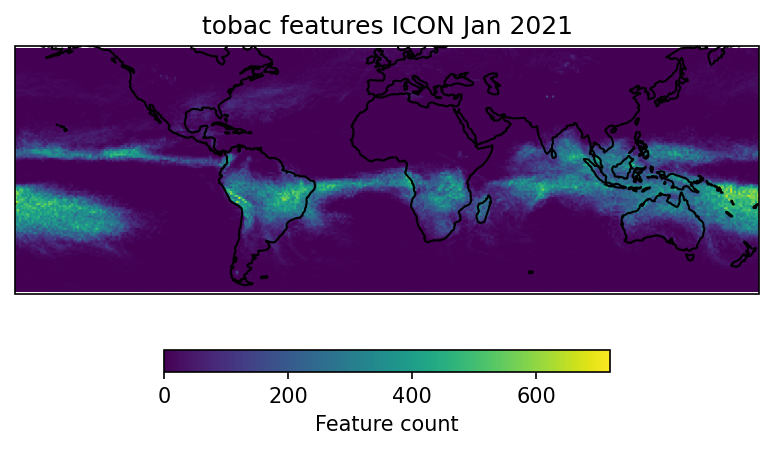

In [61]:
feature_hist = np.histogram2d(
    tracks["latitude"].to_numpy(), 
    tracks["longitude"].to_numpy(), 
    bins=[np.linspace(-60,60,121), np.linspace(0,360,361)]
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

img = ax.imshow(feature_hist, extent=[0,360,60,-60])
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("tobac features ICON Jan 2021")

plt.colorbar(img, label="Feature count", orientation="horizontal", shrink=0.6)

In [63]:
from scipy.stats import binned_statistic_2d

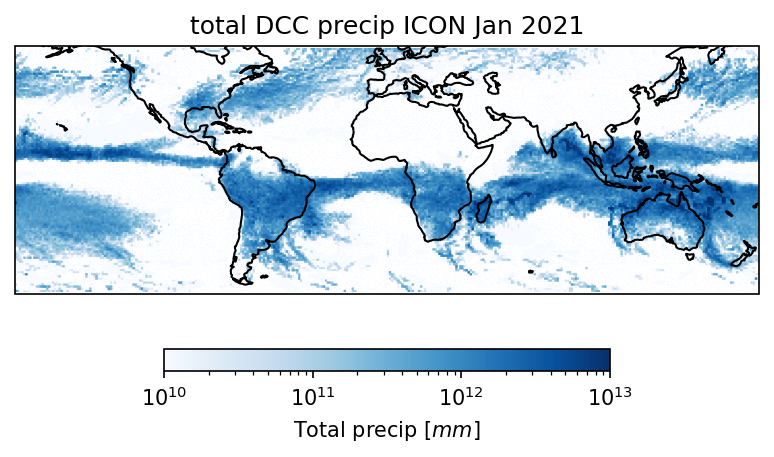

In [72]:
total_precip = binned_statistic_2d(
    tracks["latitude"].to_numpy(), 
    tracks["longitude"].to_numpy(), 
    tracks["total_precip"].to_numpy(), 
    bins=[np.linspace(-60,60,121), np.linspace(0,360,361)],
    statistic=np.nansum
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

from matplotlib.colors import LogNorm
img = ax.imshow(total_precip, extent=[0,360,60,-60], norm=LogNorm(vmin=1e10, vmax=1e13), cmap="Blues")
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("total DCC precip ICON Jan 2021")

plt.colorbar(img, label="Total precip [$mm$]", orientation="horizontal", shrink=0.6)

In [74]:
track_max_area = tracks.groupby("track").apply(
    lambda df: np.nanmax(
        df.groupby("time").area.sum().to_numpy()
    )
)

/tmp/ipykernel_1299431/2347823151.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  track_max_area = tracks.groupby("track").apply(


In [75]:
track_max_area

track
1         6.709439e+09
2         9.938497e+09
3         1.933690e+10
4         1.757575e+10
5         9.868600e+09
              ...     
160202    4.246144e+09
160206    3.623368e+09
160207    1.407576e+10
160208    1.591061e+10
160212    3.339812e+10
Length: 147192, dtype: float64

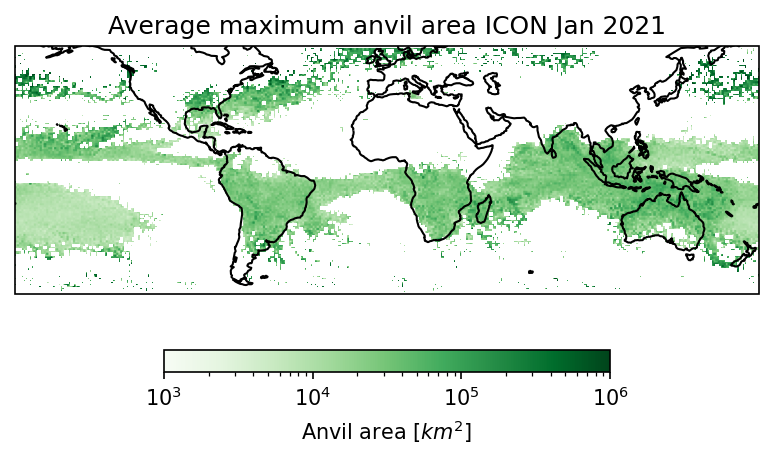

In [80]:
average_max_area = binned_statistic_2d(
    track_latlon["lat"].to_numpy(), 
    track_latlon["lon"].to_numpy(), 
    track_max_area.to_numpy() /1e6, 
    bins=[np.linspace(-60,60,121), np.linspace(0,360,361)],
    statistic=np.nanmean
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

from matplotlib.colors import LogNorm
img = ax.imshow(average_max_area, extent=[0,360,60,-60], norm=LogNorm(vmin=1e3, vmax=1e6), cmap="Greens")
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("Average maximum anvil area ICON Jan 2021")

plt.colorbar(img, label="Anvil area [$km^{2}$]", orientation="horizontal", shrink=0.6)

In [81]:
tracks.min_BT

244        210.230362
287        219.744171
301        225.410858
351        207.813599
408        210.462936
              ...    
5080906    214.664124
5080907    223.431229
5080908    221.838959
5080910    224.014160
5080911    221.250763
Name: min_BT, Length: 2262227, dtype: float64

In [116]:
track_min_bt = tracks.groupby("track").min_BT.min()

In [117]:
track_min_bt

track
1         210.230362
2         210.141922
3         208.129593
4         193.322922
5         193.702667
             ...    
160202    202.738068
160206    211.455719
160207    217.550079
160208    216.884766
160212    213.072998
Name: min_BT, Length: 147192, dtype: float64

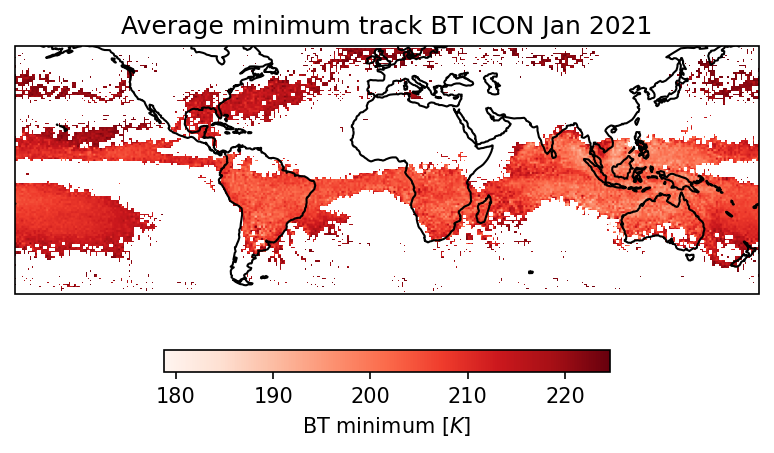

In [119]:
average_min_BT = binned_statistic_2d(
    track_latlon["lat"].to_numpy(), 
    track_latlon["lon"].to_numpy(), 
    track_min_bt.to_numpy(), 
    bins=[np.linspace(-60,60,121), np.linspace(0,360,361)],
    statistic=np.nanmean
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

# from matplotlib.colors import LogNorm
img = ax.imshow(average_min_BT, extent=[0,360,60,-60], cmap="Reds")
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("Average minimum track BT ICON Jan 2021")

plt.colorbar(img, label="BT minimum [$K$]", orientation="horizontal", shrink=0.6)

In [87]:
cells_per_track = tracks.groupby("track").cell.apply(lambda x: np.unique(x).size)

In [89]:
cells_per_track.max()

82

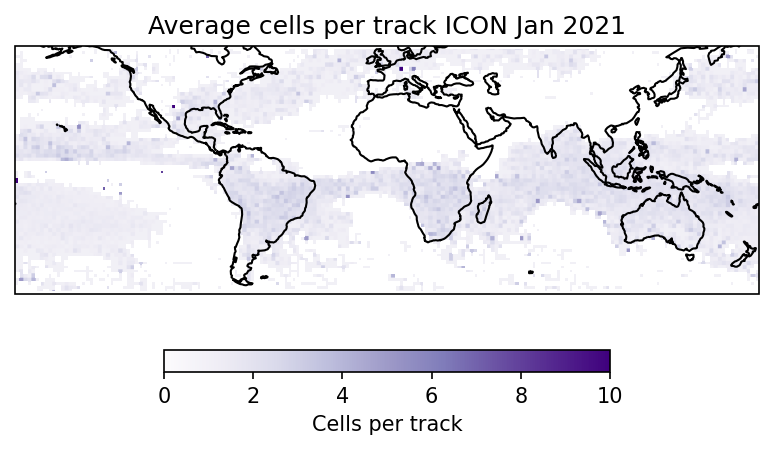

In [92]:
average_cells = binned_statistic_2d(
    track_latlon["lat"].to_numpy(), 
    track_latlon["lon"].to_numpy(), 
    cells_per_track.to_numpy(), 
    bins=[np.linspace(-60,60,61), np.linspace(0,360,181)],
    statistic=np.nanmean
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

from matplotlib.colors import LogNorm
img = ax.imshow(average_cells, extent=[0,360,60,-60], cmap="Purples", vmin=0, vmax=10)
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("Average cells per track ICON Jan 2021")

plt.colorbar(img, label="Cells per track", orientation="horizontal", shrink=0.6)

In [93]:
from scipy.stats import circmean

def circmean_hour(x):
    return circmean(x, high=24, low=0)


In [112]:
feature_local_hour = (
    (
        tracks.time.to_numpy() 
        - tracks.time.to_numpy().astype("datetime64[D]")
    ).astype(int)/3.6e12 + tracks.longitude.to_numpy()/15
)%24

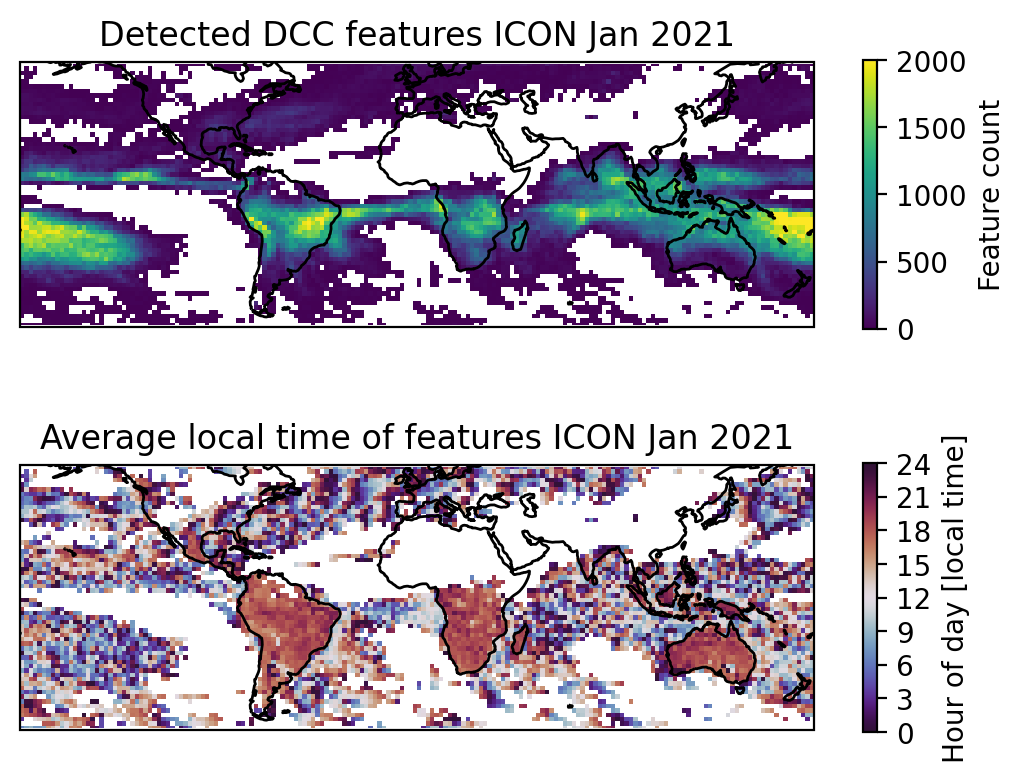

In [137]:
from numpy import ma

average_tod = binned_statistic_2d(
    tracks["latitude"].to_numpy(), 
    tracks["longitude"].to_numpy(), 
    feature_local_hour, 
    bins=[np.linspace(-60,60,61), np.linspace(0,360,181)],
    statistic=circmean_hour
)[0]

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=200, subplot_kw=dict(projection=ccrs.PlateCarree()))

feature_hist = np.histogram2d(
    tracks["latitude"].to_numpy(), 
    tracks["longitude"].to_numpy(), 
    bins=[np.linspace(-60,60,61), np.linspace(0,360,181)]
)[0] 

img = ax1.imshow(ma.array(feature_hist, mask=feature_hist==0), extent=[0,360,60,-60], interpolation="nearest", vmin=0, vmax=2000)
ax1.coastlines()
ax1.set_extent([-180,180,-60,60])
ax1.set_title("Detected DCC features ICON Jan 2021")

plt.colorbar(img, ax=ax1, label="Feature count", orientation="vertical", shrink=0.8)

img = ax2.imshow(average_tod, extent=[0,360,60,-60], cmap="twilight_shifted", vmin=0, vmax=24, interpolation="nearest")
ax2.coastlines()
ax2.set_extent([-180,180,-60,60])
ax2.set_title("Average local time of features ICON Jan 2021")

cbar = plt.colorbar(img, ax=ax2, label="Hour of day [local time]", orientation="vertical", shrink=0.8)
cbar.set_ticks(range(0,25,3))
# cax_r.yaxis.set_minor_locator(MultipleLocator(1))

In [122]:
tracks

,feature,frame,idx,hdim_1,hdim_2,detection_pixel_count,threshold_value,min_BT,time,timestr,latitude,longitude,segmentation_pixel_count,area,max_precip,total_precip,cell,time_cell,track,time_track
244,245,0,593,460.666667,2698.750000,12,241,210.230362,2021-01-01 00:00:00,2021-01-01 00:00:00,13.883333,269.925000,13,1.558586e+09,7.893450,2.411294e+09,245,0 days 00:00:00,1,0 days 00:00:00
287,288,0,770,529.312500,1108.875000,16,241,219.744171,2021-01-01 00:00:00,2021-01-01 00:00:00,7.018750,110.937500,20,2.451244e+09,16.900414,7.281549e+09,288,0 days 00:00:00,2,0 days 00:00:00
301,302,0,843,551.434783,1134.826087,23,241,225.410858,2021-01-01 00:00:00,2021-01-01 00:00:00,4.806522,113.532609,34,4.185231e+09,18.942616,1.031786e+10,302,0 days 00:00:00,3,0 days 00:00:00
351,352,0,1056,654.571429,855.214286,14,241,207.813599,2021-01-01 00:00:00,2021-01-01 00:00:00,-5.507143,85.571429,14,1.721082e+09,10.164636,3.730940e+09,352,0 days 00:00:00,4,0 days 00:00:00
408,409,0,1395,725.818182,1033.636364,11,241,210.462936,2021-01-01 00:00:00,2021-01-01 00:00:00,-12.631818,103.413636,11,1.325682e+09,11.008533,1.786169e+09,409,0 days 00:00:00,5,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5080906,5080907,2975,4804,981.772727,2258.045453,22,225,214.664124,2021-01-31 23:45:00,2021-01-31 23:45:00,-38.227273,225.854545,81,7.868651e+09,23.922497,1.775874e+10,1376074,0 days 00:30:00,158405,0 days 07:45:00
5080907,5080908,2975,4805,992.083333,2287.166667,12,225,223.431229,2021-01-31 23:45:00,2021-01-31 23:45:00,-39.258333,228.766667,289,2.767879e+10,9.427121,1.750849e+10,1368425,0 days 04:30:00,159269,0 days 04:30:00
5080908,5080909,2975,4807,1006.878788,2300.303031,33,225,221.838959,2021-01-31 23:45:00,2021-01-31 23:45:00,-40.737879,230.080303,332,3.112467e+10,3.099747,2.226451e+10,1373198,0 days 02:00:00,159785,0 days 02:30:00
5080910,5080911,2975,4811,1044.785714,2411.928573,14,225,224.014160,2021-01-31 23:45:00,2021-01-31 23:45:00,-44.528571,241.242857,372,3.290363e+10,0.296537,6.442399e+08,1376694,0 days 00:15:00,159908,0 days 02:00:00


In [123]:
out_ds = tracks.set_index(tracks.feature).to_xarray()

out_ds = out_ds.rename_vars(
    {
        # "latitude": "feature_latitude",
        # "longitude": "feature_longitude",
        "time": "time_feature",
        "hdim_1": "y",
        "hdim_2": "x",
        # "num": "detection_pixel_count",
        # "feature_min_BT": "min_BT",
        # "ncells": "segmentation_pixel_count",
    }
)

In [124]:
out_ds

<xarray.Dataset> Size: 362MB
Dimensions:                   (feature: 2262227)
Coordinates:
  * feature                   (feature) int64 18MB 245 288 ... 5080911 5080912
Data variables: (12/19)
    frame                     (feature) int64 18MB 0 0 0 0 ... 2975 2975 2975
    idx                       (feature) int64 18MB 593 770 843 ... 4811 4812
    y                         (feature) float64 18MB 460.7 529.3 ... 1.054e+03
    x                         (feature) float64 18MB 2.699e+03 ... 2.648e+03
    detection_pixel_count     (feature) int64 18MB 12 16 23 14 ... 12 33 14 28
    threshold_value           (feature) int64 18MB 241 241 241 ... 225 225 225
    ...                        ...
    max_precip                (feature) float64 18MB 7.893 16.9 ... 0.0005441
    total_precip              (feature) float64 18MB 2.411e+09 ... 9.028e+05
    cell                      (feature) int64 18MB 245 288 ... 1376694 1375584
    time_cell                 (feature) timedelta64[ns] 18MB 00:00:00 ... 00:...
    track                     (feature) int64 18MB 1 2 3 ... 159908 160156
    time_track                (feature) timedelta64[ns] 18MB 00:00:00 ... 00:...